Ch3. 신경망 시작하기
----

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K
from keras import models, layers

%matplotlib inline

Using TensorFlow backend.


### 3.1 신경망의 구조

- 네트워크(또는 모델)를 구성하는 층
- 입력 데이터와 그에 상응하는 타깃
- 학습에 사용할 피드백 신호를 정의하는 loss function
- 학습 진행 방식을 결정하는 optimizer

### 그림 들어갈 부분 - 그려 넣기

#### 3.1.1 layer(층) : 딥러닝의 구성 단위

layer은 하나 이상의 텐서를 입력으로 받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈
- 대부분 가중치라는 층의 상태를 가짐
- 가중치는 SGD에 의해 학습되는 하나 이상의 텐서


layer는 처리 방식
- Fully connected layer, recurrent layer, convolution layer 등등
- 케라스에서는 호환 가능한 층들을 엮어 데이터 변환 pipeline을 구성함으로써 딥러닝 모델을 만듬
- layer compatibility는 각 층이 특정 크기의 입력 텐서만 받고 특정 크기의 출력 텐서를 반환 한다는 사실을 말함

keras에서는 자동으로 다음 층이 모델의 상위 층의 크기에 맞추어 준다. 우왕....

```python
model = models.Sequential()
model.add(layers.Dense(32, input_shape(784, )))
model.add(layers.Dense(10))
```

#### 3.1.2 model :  network of layer

딥러닝 모델은 층으로 만든 Directed Acyclic Graph, DAG(비순환 유향 그래프) 이다.
- 네트워크 구조는 hypothesis space(가설 공간)을 정의하고 텐서 연산에 포함된 가중치 텐서를 찾는 것
- 딱 맞는 거 찾기 어려움....힝...-0-

#### 3.1.3 loss function & Optimizer : 학습 과정을 조절하는 열쇠

**loss function(손실 함수)** : 훈련하는 동안 최소화 될 값, 주어진 문제에 대한 성공 지표가 됨
- 이진 분류 문제 : binary crossentropy
- multi classification : categorical_crossentropy
- regression : mse
- sequence : CTC(connection temporal classification)
- 이외에도 많음...

**optimizer** : loss function을 기반으로 network가 어떻게 업데이트될지 결정, 특정 종류의 SGD을 구현...등등등

### 3.2 케라스 소개
- 케라스 짱!
- ~~하지만 텐서플로가 나타나면 어떻게 될까?!~~

#### 3.2.2 케라스 사용한 개발

두 가지 방식으로 구현 가능
- Sequential 클래스 이용 : 7장 까지는 이거 쓸 거임
- 함수형 API(완전히 임의의 구조를 만들 수 있는 DAG 만듬)

모델 구조 정의된 다음에는 뭘 썼는지는 중요하지 않음

### 3.3 생략


### 3.4 영화 리뷰 분류 : 이진 분류 예제

#### 3.4.1 IMDB 데이터셋

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

- num_words = 10000?
  - 가장 자주 나타나는 단어 1만 개만 사용
  - 드물게 나타나는 단어 무시
- 긍정 1, 부정 0

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [4]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

#### 3.4.2 데이터 준비

**list to tensor**

방법 1.
- 같은 길이가 되도록 리스트에 padding(패딩)을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환
- 그다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용(embedding 층을 말하며, 나중에 설명 예정)
- padding?
  - https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html
  - https://m.blog.naver.com/wideeyed/221665256911

방법 2.
- 리스트를 one-hot encoding하여 0과 1의 벡터로 변환

In [5]:
# understanding padding
# 자세한 건 공식 문서 참고

a = [1, 2, 3, 4, 5]
np.pad(a, (2, 3), 'constant', constant_values=(4, 6))

array([4, 4, 1, 2, 3, 4, 5, 6, 6, 6])

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)

# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
# Our vectorized labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 3.4.3 신경망 모델 만들기

- 층 쌓기
- Dense layer에 전달한 parameter 16은 hidden unit의 개수이다.
  - 하나의 hidden unit은 층이 나타내는 표현 공간에서 하나의 차원이 됨
  - 16개의 은닉이 있다는 것은 가중치 행렬 W의 크기가 (input_dimension, 16)이라는 뜻
  - 입력 데이터와 W를 점곱하면 입력 데이터가 16차원으로 표현된 공간으로 투영
  - 표현 공간의 차원은 '신경망이 내재된 표현을 학습할 때 가질 수 있는 자유도'라고 표현 가능
  - 차원이 크면 더욱 복잡한 표현을 할 수 있지만 계산 비용이 커지고 원하지 않는 패턴을 학습할 수도 있다.

Dense layer를 쌓을 때 두 가지 중요한 구조상이 결정이 필요
- 얼마나 많은 층을 사용할 것인가?
- 각 층에 얼마나 많은 hidden unit을 둘 것인가?
- 4장까지는 일단 하라는대로 하자

![alt text](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### 활성화 함수(activation function)? 왜 필요한가?

- relu와 같은 활성화 함수(또는 비선형(non-linear))가 없다면 Dense layer는 선형적인 연산인 점곱과 덧셈 2개로 구성됨
- output = dot(W, input) + b
- 그러므로 이 층은 입력에 대한 선형 변환만을 학습할 수 있다. 그러나 선형 층을 깊게 쌓아도 여전히 하나의 선형 연산이기 때무에 층을 여러개로 구성하는 장점이 없음, 즉 층을 여러개로 쌓아도 가설 공간이 확장되지 않음
- 가설 공간을 풍부하게 만들어 층을 깊게 만드는 장점을 살리기 위해서는 비선형성 또는 활성화 함수를 추가해야 함
- relu 짱!

In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
# 아래와 같이 직접 만들어서 전달 가능

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

#### 3.4.4 훈련 검증

훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해서는 원본 훈련 데이터에서 10000개의 샘플 추출하여 검증 세트 만들어야 함

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 280us/step - loss: 0.5202 - binary_accuracy: 0.7980 - val_loss: 0.4066 - val_binary_accuracy: 0.8539
Epoch 2/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.3171 - binary_accuracy: 0.9010 - val_loss: 0.3150 - val_binary_accuracy: 0.8815
Epoch 3/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.2332 - binary_accuracy: 0.9243 - val_loss: 0.2833 - val_binary_accuracy: 0.8899
Epoch 4/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.1855 - binary_accuracy: 0.9403 - val_loss: 0.2755 - val_binary_accuracy: 0.8905
Epoch 5/20
15000/15000 [==============================] - 1s 66us/step - loss: 0.1503 - binary_accuracy: 0.9520 - val_loss: 0.2886 - val_binary_accuracy: 0.8840
Epoch 6/20
15000/15000 [==============================] - 1s 66us/step - loss: 0.1261 - binary_accuracy: 0.9614 - val_loss: 0.2903 - val_binary

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

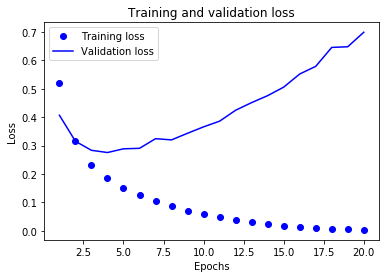

In [18]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


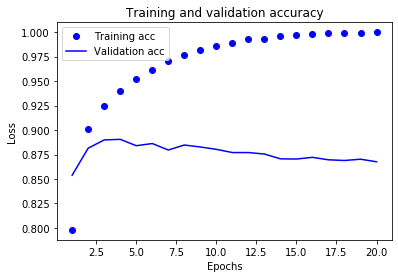

In [19]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 55us/step - loss: 0.4577 - accuracy: 0.8207
Epoch 2/4
25000/25000 [==============================] - 1s 41us/step - loss: 0.2641 - accuracy: 0.9085
Epoch 3/4
25000/25000 [==============================] - 1s 42us/step - loss: 0.2035 - accuracy: 0.9278
Epoch 4/4
25000/25000 [==============================] - 4s 146us/step


In [21]:
results

[0.2937098868560791, 0.8842800259590149]

In [22]:
model.predict(x_test)

array([[0.2487448 ],
       [0.9991991 ],
       [0.9304348 ],
       ...,
       [0.17773016],
       [0.10950935],
       [0.6337426 ]], dtype=float32)

#### 3.4.7 정리

- 원본 데이터를 신경망에 텐서로 주입하기 위해서는 꽤 많은 전처리가 필요
  - 단어 시퀀스는 이진 벡터로 인코딩 될 수 있고, 다른 인코딩 방식도 존재
- relu 활성화 함수와 함꼐 Dense layer를 쌓은 네트워크는 여러 종유의 문제에 적용 가능
- 이진 분류 문제에서 네트워크는 하나의 유닛과 sigmoid 활성화 함수를 가진 dense layer로 끝나야 함
  - 신경망의 출력은 확률을 나타내는 0과 1 사이의 스칼라 값
- 이진 분류 문제에서 이런 스칼라 시그모이드 출력에 대해 사용할 loss function은 binary_crossentropy
- rmsprop optimizer는 문제에 상관없이 일반적으로 충분히 좋은 선택(잘 쓰자... : )
- 모델 평가는 중요하다. 중요하다. 중요하다.

### 3.5 뉴스 기사 분류 : 다중 분류 문제

- 다중 분류 : multiclass classification
- 각 데이터 포인트가 여러 개의 범주에 속하는 경우

#### 3.5.1 로이터 데이터셋

- 케라스에 있음

In [23]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 7s 3us/step


- IMDB 하는 것처럼 진행

In [24]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 2s 4us/step


In [32]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [25]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [26]:
# one-hot encoding

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [27]:
# keras utils for one-hot encoding

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

- 이진 분류와 다르게 차원을 늘려서 접근 할 거임
- 이진 분류 할 떄 16차원으로 했는데 현재 46개의 정보를 가지고 있으므로 차원을 더 늘려서 접근

In [28]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

- 마지막 Dense layer의 크기가 46이다.
- 각 입력 샘플에 대하여 46차원의 벡터를 출력한다는 뜻
- 마지막 층에는 softmax 활성화 함수가 사용되었음
  - 예를 들면, 46개의 차원에 대한 확률 분포를 출력
  - 전체 확률 합을 구하면 1이다.

이런 문제에서 사용한 최선의 loss function은 categorical_crossentropy이다.
  - 두 확률 분포 사이의 거리를 측정하는 방식
  - 여기에서는 네트워크가 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리
  - 거리를 최소화하면 진짜 레이블에 가능한 가까운 출력을 내도록 모델 훈련

In [29]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### 3.5.4 훈련 검증

In [30]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 138us/step - loss: 2.7622 - accuracy: 0.4825 - val_loss: 1.8210 - val_accuracy: 0.6410
Epoch 2/20
7982/7982 [==============================] - 0s 50us/step - loss: 1.4701 - accuracy: 0.6907 - val_loss: 1.3274 - val_accuracy: 0.7090
Epoch 3/20
7982/7982 [==============================] - 0s 50us/step - loss: 1.0734 - accuracy: 0.7705 - val_loss: 1.1701 - val_accuracy: 0.7430
Epoch 4/20
7982/7982 [==============================] - 0s 53us/step - loss: 0.8433 - accuracy: 0.8254 - val_loss: 1.0324 - val_accuracy: 0.7860
Epoch 5/20
7982/7982 [==============================] - 0s 52us/step - loss: 0.6652 - accuracy: 0.8608 - val_loss: 0.9780 - val_accuracy: 0.8030
Epoch 6/20
7982/7982 [==============================] - 0s 50us/step - loss: 0.5342 - accuracy: 0.8909 - val_loss: 0.9253 - val_accuracy: 0.8060
Epoch 7/20
7982/7982 [==============================] - 0s 53us/step - loss: 0.42

#### 3.5.5 새로운 데이터에 대해 예측하기

46개의 토픽에 대한 확률 분포를 반환

In [33]:
predictions = model.predict(x_test)

In [34]:
predictions[0]

array([2.6922977e-05, 4.0885934e-06, 9.0506255e-08, 9.9292129e-01,
       4.6137469e-03, 1.4887469e-06, 9.9708200e-11, 1.3415823e-06,
       3.1713961e-04, 1.4717997e-06, 1.6283828e-05, 9.8764570e-04,
       3.9449333e-07, 1.4796563e-05, 8.7394184e-08, 6.7486025e-07,
       2.8775288e-05, 2.4288042e-07, 8.2137257e-07, 2.3360245e-04,
       6.9229567e-04, 1.7364346e-06, 9.6043937e-07, 3.7382448e-05,
       2.9346467e-07, 4.9522253e-08, 4.8981517e-09, 7.4139962e-07,
       1.7663995e-05, 6.3677589e-06, 7.0644759e-08, 1.0515985e-07,
       1.6017233e-07, 6.7123594e-08, 1.0514160e-07, 3.0029876e-09,
       5.2601747e-05, 1.3446763e-07, 1.8484876e-07, 1.5643927e-05,
       1.9508956e-07, 2.1211263e-06, 7.7000301e-08, 1.3349349e-07,
       5.7464766e-09, 5.2904605e-09], dtype=float32)

In [35]:
predictions[0].shape

(46,)

In [36]:
np.sum(predictions[0])

0.99999994

In [37]:
# 가장 큰 값이 예측 클래스가 된다.

np.argmax(predictions[0])

3

#### 3.5.6 레이블과 손실을 다루는 다른 방법

레이블을 인코딩하는 다른 방법은 정수 텐서로 변환하는 것

In [38]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

이 방식을 사용하려면 loss function 하나만 바꾸면 됨
- categorical_crossentropy는 레이블이 범주형 인코딩 되어 있을 것으로 판단
- 정수 레이블을 사용할 때는 sparse_categorical_crossentropy를 사용해야 함

In [40]:
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['acc'])

#### 3.5.7 충분히 큰 중간층을 두어야 하는 이유

In [42]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 103us/step - loss: 2.5613 - accuracy: 0.3339 - val_loss: 1.9329 - val_accuracy: 0.5350
Epoch 2/20
7982/7982 [==============================] - 1s 75us/step - loss: 1.7158 - accuracy: 0.5492 - val_loss: 1.6212 - val_accuracy: 0.5810
Epoch 3/20
7982/7982 [==============================] - 1s 77us/step - loss: 1.3766 - accuracy: 0.6502 - val_loss: 1.4243 - val_accuracy: 0.6520
Epoch 4/20
7982/7982 [==============================] - 1s 85us/step - loss: 1.1767 - accuracy: 0.6736 - val_loss: 1.3417 - val_accuracy: 0.6760
Epoch 5/20
7982/7982 [==============================] - 1s 78us/step - loss: 1.0403 - accuracy: 0.7091 - val_loss: 1.3028 - val_accuracy: 0.6970
Epoch 6/20
7982/7982 [==============================] - 1s 77us/step - loss: 0.9301 - accuracy: 0.7466 - val_loss: 1.2683 - val_accuracy: 0.7080
Epoch 7/20
7982/7982 [==============================] - 1s 76us/step - loss: 0.84

왜 val_accuracy는 감소 되었나?
- 원인 대부분은 정보를 중간층의 표현 공간으로 넣으려고 해서
- 필요한 정보를 4차원안에 다 넣을 수 없어서 정확도가 감소한 거다.

#### 3.5.9 정리

- N개의 클래스로 데이터 포인트를 분류하려면 네트워크의 마지막 Dense layer의 크기는 N이 되어야 한다.
- 단일 레이블, 다중 분류 문제에서는 N개의 클래스에 대한 확률 분포를 출력하기 위해서는 softmax activation function을 사용해야 한다.
- 다중 분류에서는 categorical_crossentropy를 사용해야 한다.
  - 이 함수는 모델이 출력한 확률 분포와 타깃 분포 사이의 거리를 최소화 한다.
- 다중 분류에서 레이블을 다루는 두 가지 방법
  - 레이블을 범주형 인코딩(또는 one-hot 인코딩)으로 인코딩 하고 categorical_crossentropy를 loss function으로 사용
  - 레이블을 정수로 인코딩하고 sparse_categorical_crossentropy를 loss function으로 사용
- 많은 수의 범주를 분류할 때 중간의 layer 크기가 너무 작아 네트워크에 정보의 병목이 생기지 않도록 해야 한다.